In [1]:
import pandas as pd
import os

PATH = "/content/drive/MyDrive/TwitchData" # txt 들어있는 폴더 경로
lis = os.listdir(PATH) # 해당 폴더의 파일 이름 리스트
filePathList = ['/'.join([PATH, filename]) for filename in lis] # 폴더 경로 + 파일 이름 합친 리스트
df = pd.read_csv(filePathList[0],sep='\t',names=["Datetime",'ID', 'Comment']) # txt 첫 파일 -> dataframe

In [2]:
df.head() # 시각화

,Datetime,ID,Comment
0,2021-05-03 17:27:59,woo6927,와난
1,2021-05-03 17:28:00,kevin7942,팤하
2,2021-05-03 17:28:05,yunooo1212,1빠
3,2021-05-03 17:28:05,yerinbaek97,ㅎㅇ
4,2021-05-03 17:28:16,ljh2609,손인욱!손인욱!


In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime']) # DateTime Column에 해당하는 자료형을 파이썬에서 지원하는 DateTime으로 변경

# 첫 시간과 마지막 시간을 가져옴.
start = df.loc[0,'Datetime']
last = df.loc[39597,'Datetime']

# 마지막 시간 - 첫 시간 (초 단위)
diff = last.to_pydatetime() - start.to_pydatetime() 
alltime = diff.seconds

# 시작 시간을 기준으로 모든 시간을 초 단위로 바꾸기
for i in range(0, len(df)):
    this_diff = df.loc[i,'Datetime'].to_pydatetime()- start.to_pydatetime() 
    df.loc[i,'sec']= int(this_diff.seconds) # int 형태의 새로운 "초" column 만들기


In [5]:
"""

    3, 5, 10 시간 간격으로 트래픽 추출
    
    sec_dic['per_3_sec'] = 3초 구간
    sec_dic['per_5_sec'] = 5초 구간
    sec_dic['per_10_sec'] = 10초 구간
            ...

"""

per_ = [3,5,10,20,30]
names = ['per_3_sec', 'per_5_sec', 'per_10_sec','per_20_sec','per_30_sec']
sec_dic = {'per_3_sec' : [], 'per_5_sec' : [], 'per_10_sec' : [],'per_20_sec' : [],'per_30_sec' : []}


for per,per_name in zip(per_,names): # 3초, 5초, 10초 구간에 대한 traffic을 dictionary 각 이름에 맞게 리스트로 넣어주기
    per_list = sec_dic[per_name] 
    this_per = per
    cnt = 0
    for i in range(len(df)):
        if df.loc[i,'sec'] <= this_per:
            cnt +=1
        
        else :
            per_list.append(cnt)
            while this_per < df.loc[i,'sec']:
                this_per += per
                if this_per < df.loc[i,'sec']:
                    per_list.append(0)
            cnt = 1


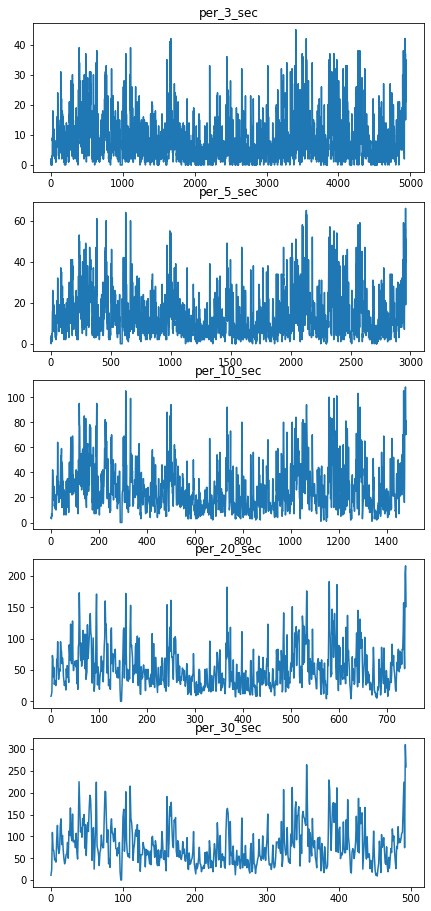

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)


ax1 = fig.add_subplot(5, 1, 1)
ax2 = fig.add_subplot(5, 1, 2)
ax3 = fig.add_subplot(5, 1, 3)
ax4 = fig.add_subplot(5, 1, 4)
ax5 = fig.add_subplot(5, 1, 5)

ax_list = [ax1, ax2, ax3, ax4, ax5]
for per_name,ax in zip(names,ax_list) :
    
    this_list = sec_dic[per_name]
    ax.plot(this_list)
    ax.set_title(per_name)


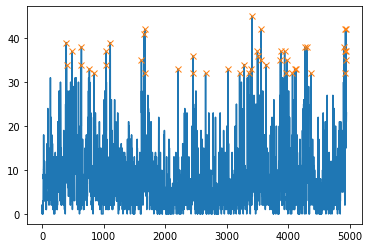

In [7]:
# 라이브러리를 사용해서 peak를 가져와주자.

from scipy.signal import find_peaks
import numpy as np

peaks, _ = find_peaks(sec_dic['per_3_sec'],height = (np.mean(sec_dic['per_3_sec'])+np.max(sec_dic['per_3_sec'])+10)/2 ) # index를 찾아준다.
plt.plot(sec_dic['per_3_sec'])
plt.plot(peaks, np.array(sec_dic['per_3_sec'])[peaks], "x")